<p id="part0"></p>
​
<p style="font-family: Arials; line-height: 2; font-size: 44px; font-weight: bold; letter-spacing: 0px; text-align: center; color: #FF8C00">Breast Cancer</p>
​
<img src="https://img.medscape.com/thumbnail_library/dt_190424_breast_cancer_800x450.jpg" width="90%" align="center" hspace="20%" vspace="5%"/>
​
<p style="font-family: Arials; font-size: 40px; font-style: normal; font-weight: bold; letter-spacing: -2px; color: #000000; line-height:2.0">Table of content:</p>
​
<p style="font-family: Arials; font-size: 18px; font-style: normal; font-weight: bold; letter-spacing: 0px; color: #000000; line-height:.5"><a href="#part1" style="color:#000000"> 1- Import Libraries</a></p>

<p style="font-family: Arials; font-size: 18px; font-style: normal; font-weight: bold; letter-spacing: 0px; color: #000000; line-height:.5"><a href="#part2" style="color:#000000"> 2- Add two datasets </a></p>


<p style="font-family: Arials; font-size: 18px; font-style: normal; font-weight: bold; letter-spacing: 0px; color: #000000; line-height:.5"><a href="#part3" style="color:#000000"> 3-EDA</a></p>

<p style="text-indent: 1vw; font-family: Arials; font-size: 16px; font-style: normal; font-weight: bold; letter-spacing: 0px; color: #000000; line-height:0.5">
<a href="#part3-1" style="color:#000000">3-1 Lable encoding</a></p>

<p style="text-indent: 1vw; font-family: Arials; font-size: 16px; font-style: normal; font-weight: bold; letter-spacing: 0px; color: #000000; line-height:0.5">
<a href="#part3-2" style="color:#000000">3-2 Useful information on datasets</a></p>

<p style="text-indent: 1vw; font-family: Arials; font-size: 16px; font-style: normal; font-weight: bold; letter-spacing: 0px; color: #000000; line-height:0.5">
<a href="#part3-3" style="color:#000000">3-3 Filling missing values </a></p>

<p style="text-indent: 1vw; font-family: Arials; font-size: 16px; font-style: normal; font-weight: bold; letter-spacing: 0px; color: #000000; line-height:0.5">
<a href="#part3-3-1" style="color:#000000">3-3-1 Filling age column </a></p>

<p style="text-indent: 1vw; font-family: Arials; font-size: 16px; font-style: normal; font-weight: bold; letter-spacing: 0px; color: #000000; line-height:0.5">
<a href="#part3-3-2" style="color:#000000">3-3-2 Filling BIRADS column </a></p>

<p style="text-indent: 1vw; font-family: Arials; font-size: 16px; font-style: normal; font-weight: bold; letter-spacing: 0px; color: #000000; line-height:0.5">
<a href="#part3-4" style="color:#000000">3-4 Feature selection</a></p>

<p style="text-indent: 1vw; font-family: Arials; font-size: 16px; font-style: normal; font-weight: bold; letter-spacing: 0px; color: #000000; line-height:0.5">
<a href="#part3-4" style="color:#000000">3-4-1 Correlation matrix</a></p>

<p style="text-indent: 1vw; font-family: Arials; font-size: 16px; font-style: normal; font-weight: bold; letter-spacing: 0px; color: #000000; line-height:0.5">
<a href="#part3-4" style="color:#000000">3-4-2 Mutual information/Gain Entropy</a></p>

<p style="text-indent: 1vw; font-family: Arials; font-size: 16px; font-style: normal; font-weight: bold; letter-spacing: 0px; color: #000000; line-height:0.5">
<a href="#part3-5" style="color:#000000">3-5 Visualization</a></p>

<p id="part1"></p>

<p style="font-family: Times New Roman; font-size: 20px; font-style: bold; font-weight: bold; letter-spacing: 0px; color: #0000FF">1- Import libraris<p>
<hr style="height: 1px; border: 1; background-color: #0000FF">

In [1]:
import pandas as pd
import numpy as np
import pydicom
from sklearn import preprocessing
from matplotlib import pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm
import cv2
import glob
import random
import os,time

<p id="part2"></p>

<p style="font-family: Times New Roman; font-size: 20px; font-style: bold; font-weight: bold; letter-spacing: 0px; color: #0000FF">2-Add two datasets?</p>
<hr style="height: 1px; border: 1; background-color: #0000FF">

add two datasets:
 
1st; https://www.kaggle.com/competitions/rsna-breast-cancer-detection    To have an access to all competition data

2nd; https://www.kaggle.com/code/mohammadamiri1/dicom-to-png/    To have an access to cropped png files, instead of dcm files

In the second dataset, we did some tasks to crop dicom files to remove uselss spaces , then turned them to png format

<p id="part3"></p>

<p style="font-family: Times New Roman; font-size: 20px; font-style: bold; font-weight: bold; letter-spacing: 0px; color: #0000FF">3- EDA</p>
<hr style="height: 1px; border: 1; background-color: #0000FF">

In [2]:
# Take a look at train.csv
train_df_dir = "/kaggle/input/rsna-breast-cancer-detection/train.csv"
train_df = pd.read_csv(train_df_dir)
train_df

,site_id,patient_id,image_id,laterality,view,age,cancer,biopsy,invasive,BIRADS,implant,density,machine_id,difficult_negative_case
0,2,10006,462822612,L,CC,61.0,0,0,0,NaN,0,NaN,29,False
1,2,10006,1459541791,L,MLO,61.0,0,0,0,NaN,0,NaN,29,False
2,2,10006,1864590858,R,MLO,61.0,0,0,0,NaN,0,NaN,29,False
3,2,10006,1874946579,R,CC,61.0,0,0,0,NaN,0,NaN,29,False
4,2,10011,220375232,L,CC,55.0,0,0,0,0.0,0,NaN,21,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54701,1,9973,1729524723,R,MLO,43.0,0,0,0,1.0,0,C,49,False
54702,1,9989,63473691,L,MLO,60.0,0,0,0,NaN,0,C,216,False
54703,1,9989,1078943060,L,CC,60.0,0,0,0,NaN,0,C,216,False
54704,1,9989,398038886,R,MLO,60.0,0,0,0,0.0,0,C,216,True


# Description of columns
* **site_id** - ID code for the source hospital.
* **patient_id** - ID code for the patient.
* **image_id** - ID code for the image.
* **laterality** - Whether the image is of the left or right breast.
* **view** - The orientation of the image. The default for a screening exam is to capture two views per breast.
* **age** - The patient's age in years.
* **implant** - Whether or not the patient had breast implants. Site 1 only provides breast implant information at the patient level, not at the breast level.
* **density** - A rating for how dense the breast tissue is, with A being the least dense and D being the most dense. Extremely dense tissue can make diagnosis more difficult. Only provided for train.
* **machine_id** - An ID code for the imaging device.
* **cancer** - Whether or not the breast was positive for malignant cancer. The target value. Only provided for train.
* **biopsy** - Whether or not a follow-up biopsy was performed on the breast. Only provided for train.
* **invasive** - If the breast is positive for cancer, whether or not the cancer proved to be invasive. Only provided for train.
* **BIRADS** - 0 if the breast required follow-up, 1 if the breast was rated as negative for cancer, and 2 if the breast was rated as normal. Only provided for train.
* **prediction_id** - The ID for the matching submission row. Multiple images will share the same prediction ID. Test only.
* **difficult_negative_case** - True if the case was unusually difficult. Only provided for train.

In [3]:
# Take a look at types of columns
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54706 entries, 0 to 54705
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   site_id                  54706 non-null  int64  
 1   patient_id               54706 non-null  int64  
 2   image_id                 54706 non-null  int64  
 3   laterality               54706 non-null  object 
 4   view                     54706 non-null  object 
 5   age                      54669 non-null  float64
 6   cancer                   54706 non-null  int64  
 7   biopsy                   54706 non-null  int64  
 8   invasive                 54706 non-null  int64  
 9   BIRADS                   26286 non-null  float64
 10  implant                  54706 non-null  int64  
 11  density                  29470 non-null  object 
 12  machine_id               54706 non-null  int64  
 13  difficult_negative_case  54706 non-null  bool   
dtypes: bool(1), float64(2)

<p id="part3-1"></p>

<p style="font-family: Times New Roman; font-size: 20px; font-style: bold; font-weight: bold; letter-spacing: 0px; color: #0000FF">3-1 Label encoding</p>
<hr style="height: 1px; border: 1; background-color: #0000FF">

In [4]:
# As you can see we knee to use label encoding here.We need to encoding culomns whcih are objects
lable_encoder = preprocessing.LabelEncoder()
train_df[['laterality','view','density','difficult_negative_case']] = train_df[['laterality','view','density','difficult_negative_case']].apply(lable_encoder.fit_transform)
train_df

,site_id,patient_id,image_id,laterality,view,age,cancer,biopsy,invasive,BIRADS,implant,density,machine_id,difficult_negative_case
0,2,10006,462822612,0,1,61.0,0,0,0,NaN,0,4,29,0
1,2,10006,1459541791,0,5,61.0,0,0,0,NaN,0,4,29,0
2,2,10006,1864590858,1,5,61.0,0,0,0,NaN,0,4,29,0
3,2,10006,1874946579,1,1,61.0,0,0,0,NaN,0,4,29,0
4,2,10011,220375232,0,1,55.0,0,0,0,0.0,0,4,21,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54701,1,9973,1729524723,1,5,43.0,0,0,0,1.0,0,2,49,0
54702,1,9989,63473691,0,5,60.0,0,0,0,NaN,0,2,216,0
54703,1,9989,1078943060,0,1,60.0,0,0,0,NaN,0,2,216,0
54704,1,9989,398038886,1,5,60.0,0,0,0,0.0,0,2,216,1


<p id="part3-2"></p>

<p style="font-family: Times New Roman; font-size: 20px; font-style: bold; font-weight: bold; letter-spacing: 0px; color: #0000FF">3-2 Useful information on datasets</p>
<hr style="height: 1px; border: 1; background-color: #0000FF">

In [5]:
Cases_with_cancer = np.where(train_df.cancer==1)
Cases_without_cancer = np.where(train_df.cancer==0)
Cases_particularly_difficult = np.where(train_df.difficult_negative_case==1)
Cases_not_particularly_difficult = np.where(train_df.difficult_negative_case==0)
No_of_hospitals = len(pd.unique(train_df.site_id))
No_of_patients = len(pd.unique(train_df.patient_id))
No_of_images = len(pd.unique(train_df.image_id))
No_of_cases_with_cancer = len(Cases_with_cancer[0])
No_of_cases_without_cancer = len(Cases_without_cancer[0])
No_of_cases_recgoznied_difficult= len(Cases_particularly_difficult[0])
No_of_cases_not_recgoznied_difficult = len(Cases_not_particularly_difficult[0])
Mean_age_of_pateients = np.mean(train_df.age)



useful_data = {'No_of_hospitals':No_of_hospitals,'No_of_patients ':No_of_patients ,
     'No_of_images':No_of_images,'No_ofcases_with_cancer':No_of_cases_with_cancer,
     'No_of_cases_without_cancer':No_of_cases_without_cancer,'No_of_cases_recgoznied_difficult':No_of_cases_recgoznied_difficult,
     'No_of_cases_not_recgoznied_difficult':No_of_cases_not_recgoznied_difficult,'Mean_age_of_pateients':Mean_age_of_pateients}

usefull_data = pd.DataFrame(useful_data, index=[0])
usefull_data

,No_of_hospitals,No_of_patients,No_of_images,No_ofcases_with_cancer,No_of_cases_without_cancer,No_of_cases_recgoznied_difficult,No_of_cases_not_recgoznied_difficult,Mean_age_of_pateients
0,2,11913,54706,1158,53548,7705,47001,58.543928


<p id="part3-3"></p>

<p style="font-family: Times New Roman; font-size: 20px; font-style: bold; font-weight: bold; letter-spacing: 0px; color: #0000FF">3-3 Filling missing values</p>
<hr style="height: 1px; border: 1; background-color: #0000FF">

First, we must take a look Null/NaN values in diffrent columns . Then, try to fill them with appropriate values

In [6]:
# Show how many Null/NaN values we have in dataset
pd.isnull(train_df).sum()

site_id                        0
patient_id                     0
image_id                       0
laterality                     0
view                           0
age                           37
cancer                         0
biopsy                         0
invasive                       0
BIRADS                     28420
implant                        0
density                        0
machine_id                     0
difficult_negative_case        0
dtype: int64

<p id="part3-3-1"></p>

<p style="font-family: Times New Roman; font-size: 20px; font-style: bold; font-weight: bold; letter-spacing: 0px; color: #0000FF">3-3-1 Filling age values</p>
<hr style="height: 1px; border: 1; background-color: #0000FF">

Use linear regreesion to predict NaN/Null values in age column

In [7]:
from sklearn.linear_model import LinearRegression
li = LinearRegression()
# With the help of correlation matrix, we could understand that fetures site_id, cancer, invasive, implant and difficult
# are more important than others on age target. So, we creat a dataframe with these feautre and age target

new_dataframe_with_null = train_df[['site_id','cancer','invasive','implant','difficult_negative_case','age']]
new_dataframe_without_null = train_df[['site_id','cancer','invasive','implant','difficult_negative_case','age']].dropna()

# set x_train and y_train
x_train = new_dataframe_without_null.iloc[:,:5] # 'site_id','cancer','invasive','implant','difficult_negative_case'
y_train = new_dataframe_without_null.iloc[:,-1]  # 'age'

# Set x_test, inculdig parameters where age == null
x_test = new_dataframe_with_null[new_dataframe_with_null['age'].isnull()].drop(columns='age')

# Run model
li.fit(x_train,y_train)

# Predict on x_test
predicted = li.predict(x_test)
print('Here, you can see predicetd ages for missing values in main dataset')
print(f'-'*50)
print(predicted)

Here, you can see predicetd ages for missing values in main dataset
--------------------------------------------------
[57.83284002 57.83284002 57.83284002 57.83284002 57.83284002 57.83284002
 57.83284002 57.83284002 57.83284002 57.83284002 55.26736597 55.26736597
 57.83284002 57.83284002 57.83284002 57.83284002 57.83284002 57.83284002
 57.83284002 57.83284002 55.26736597 55.26736597 55.26736597 57.83284002
 57.83284002 57.83284002 55.26736597 55.26736597 57.83284002 57.83284002
 57.83284002 57.83284002 57.83284002 57.83284002 57.83284002 57.83284002
 57.83284002]


In [8]:
# fill missing age values with predicted
train_df.loc[train_df.age.isnull(), 'age'] = predicted

In [9]:
train_df.isnull().sum()

site_id                        0
patient_id                     0
image_id                       0
laterality                     0
view                           0
age                            0
cancer                         0
biopsy                         0
invasive                       0
BIRADS                     28420
implant                        0
density                        0
machine_id                     0
difficult_negative_case        0
dtype: int64

<p id="part3-3-2"></p>

<p style="font-family: Times New Roman; font-size: 20px; font-style: bold; font-weight: bold; letter-spacing: 0px; color: #0000FF">3-3-2 Filling BIRADS values</p>
<hr style="height: 1px; border: 1; background-color: #0000FF">

Use Knn algorithm to predicted BIRADS

In [10]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)

#With the help of correlation matrix, we could understand that fetures 'cancer','invasive','difficult_negative_case','density','machine_id','biopsy'
# are more important than others on 'BIRADS' target. So, we creat a dataframe with these feautre and 'BIRADS' target

new_dataframe_with_null = train_df[['cancer','invasive','difficult_negative_case','density','machine_id','biopsy','BIRADS']]
new_dataframe_without_null = train_df[['cancer','invasive','difficult_negative_case','density','machine_id','biopsy','BIRADS']].dropna()

# set x_train and y_train
x_train = new_dataframe_without_null.iloc[:,:6] # 'cancer','invasive','difficult_negative_case','density','machine_id','biopsy'
y_train = new_dataframe_without_null.iloc[:,-1]  # 'BIRADS'

# Run model
knn.fit(x_train,y_train)

# Set x_test, inculdig parameters where BIRADS == null
x_test = new_dataframe_with_null[new_dataframe_with_null['BIRADS'].isnull()].drop(columns='BIRADS')

# Predicted
predicted = knn.predict(x_test)
print('Number of predicted values:',len(predicted))
predicted



Number of predicted values: 28420


array([0., 0., 0., ..., 0., 1., 1.])

In [11]:
# fill missing BIRADS values with predicted
train_df.loc[train_df.BIRADS.isnull(), 'BIRADS'] = predicted

In [12]:
train_df.isnull().sum()

site_id                    0
patient_id                 0
image_id                   0
laterality                 0
view                       0
age                        0
cancer                     0
biopsy                     0
invasive                   0
BIRADS                     0
implant                    0
density                    0
machine_id                 0
difficult_negative_case    0
dtype: int64

<p id="part3-4"></p>

<p style="font-family: Times New Roman; font-size: 20px; font-style: bold; font-weight: bold; letter-spacing: 0px; color: #0000FF">3-4 Feature selection</p>
<hr style="height: 1px; border: 1; background-color: #0000FF">

Two common fueature selecetion are correlation matrix and mutual information/Gian Entropy

<p id="part3-4-1"></p>

<p style="font-family: Times New Roman; font-size: 20px; font-style: bold; font-weight: bold; letter-spacing: 0px; color: #0000FF">3-4-1 Correlation matrix</p>
<hr style="height: 1px; border: 1; background-color: #0000FF">

<AxesSubplot:>

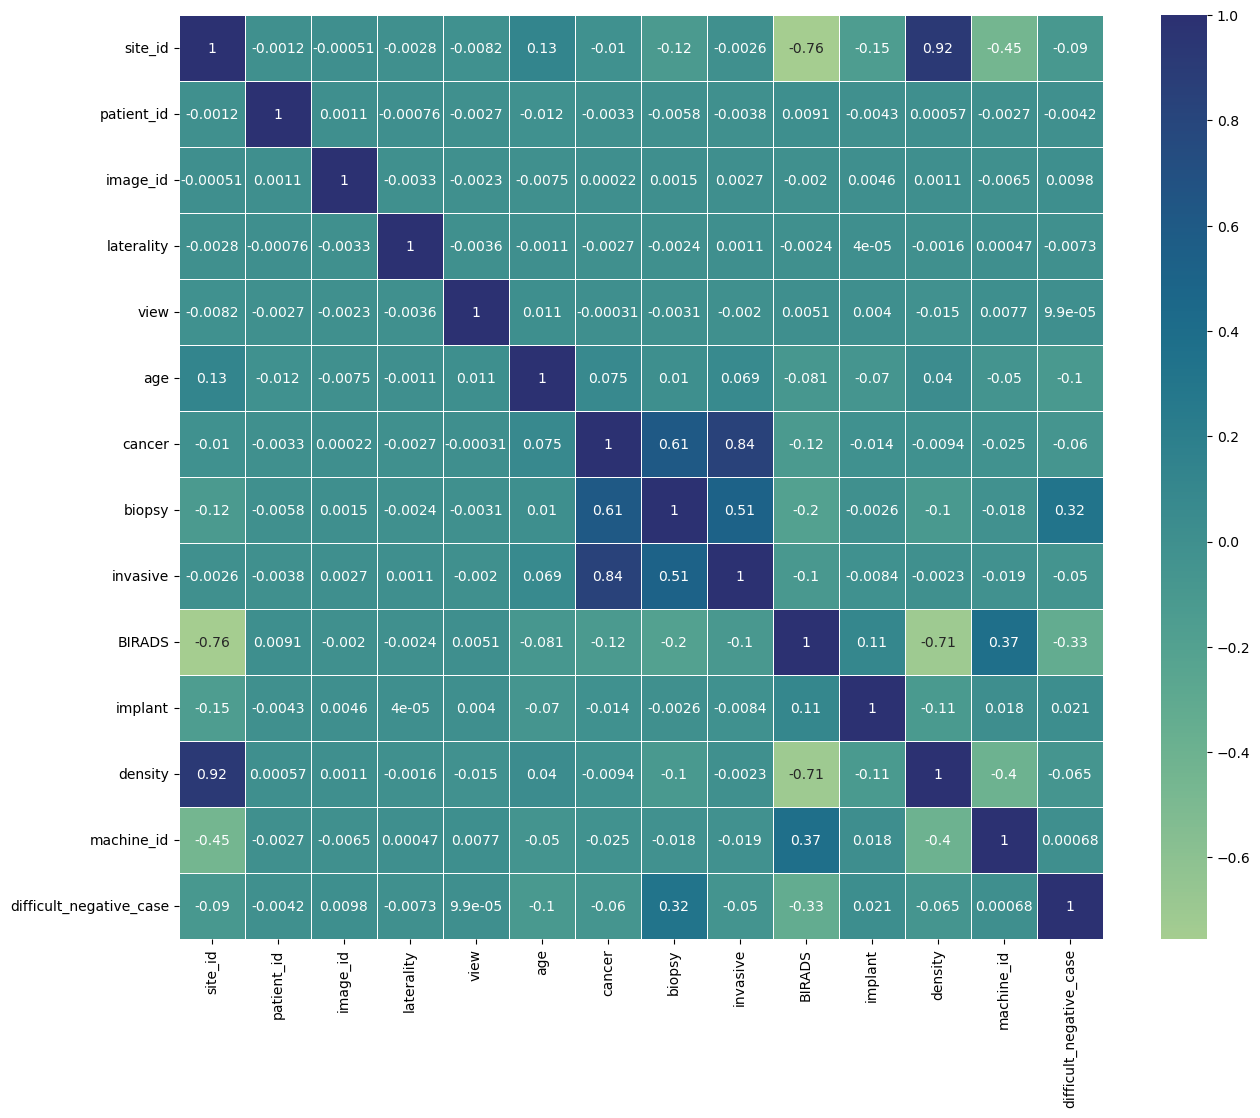

In [13]:
# We need to know the effect of fetures on each other and on traget
f, ax = plt.subplots(figsize=(15, 12))
corr = train_df.corr()
sns.heatmap(corr,annot=True,linewidth=.5,
            cmap='crest',
            square=True, ax=ax)

<p id="part3-4-2"></p>

<p style="font-family: Times New Roman; font-size: 20px; font-style: bold; font-weight: bold; letter-spacing: 0px; color: #0000FF">3-4-2 Mutual Info/Gain Entropy</p>
<hr style="height: 1px; border: 1; background-color: #0000FF">

In [14]:
train_df

,site_id,patient_id,image_id,laterality,view,age,cancer,biopsy,invasive,BIRADS,implant,density,machine_id,difficult_negative_case
0,2,10006,462822612,0,1,61.0,0,0,0,0.0,0,4,29,0
1,2,10006,1459541791,0,5,61.0,0,0,0,0.0,0,4,29,0
2,2,10006,1864590858,1,5,61.0,0,0,0,0.0,0,4,29,0
3,2,10006,1874946579,1,1,61.0,0,0,0,0.0,0,4,29,0
4,2,10011,220375232,0,1,55.0,0,0,0,0.0,0,4,21,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54701,1,9973,1729524723,1,5,43.0,0,0,0,1.0,0,2,49,0
54702,1,9989,63473691,0,5,60.0,0,0,0,1.0,0,2,216,0
54703,1,9989,1078943060,0,1,60.0,0,0,0,1.0,0,2,216,0
54704,1,9989,398038886,1,5,60.0,0,0,0,0.0,0,2,216,1


For mutual Info we need to specify x_train and y_train. Here, 'cancer' column located in the middle of dataset is the target.So, for convinient we moved it to the last column.

In [15]:
cancer_column = train_df.pop('cancer')

In [16]:
train_df.insert(13,'cancer',cancer_column)
train_df

,site_id,patient_id,image_id,laterality,view,age,biopsy,invasive,BIRADS,implant,density,machine_id,difficult_negative_case,cancer
0,2,10006,462822612,0,1,61.0,0,0,0.0,0,4,29,0,0
1,2,10006,1459541791,0,5,61.0,0,0,0.0,0,4,29,0,0
2,2,10006,1864590858,1,5,61.0,0,0,0.0,0,4,29,0,0
3,2,10006,1874946579,1,1,61.0,0,0,0.0,0,4,29,0,0
4,2,10011,220375232,0,1,55.0,0,0,0.0,0,4,21,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54701,1,9973,1729524723,1,5,43.0,0,0,1.0,0,2,49,0,0
54702,1,9989,63473691,0,5,60.0,0,0,1.0,0,2,216,0,0
54703,1,9989,1078943060,0,1,60.0,0,0,1.0,0,2,216,0,0
54704,1,9989,398038886,1,5,60.0,0,0,0.0,0,2,216,1,0


In [17]:
from sklearn.feature_selection import mutual_info_classif
x_train = train_df.iloc[:,:13]
y_train =train_df.iloc[:,-1]
mutual_info = mutual_info_classif(x_train,y_train)
mutual_info

array([0.00614197, 0.02652409, 0.00097298, 0.00301173, 0.00658525,
       0.00333865, 0.06578188, 0.06499953, 0.01526874, 0.        ,
       0.00552107, 0.00370403, 0.00404476])

In [18]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = x_train.columns
mutual_info.sort_values(ascending=False)

biopsy                     0.065782
invasive                   0.065000
patient_id                 0.026524
BIRADS                     0.015269
view                       0.006585
site_id                    0.006142
density                    0.005521
difficult_negative_case    0.004045
machine_id                 0.003704
age                        0.003339
laterality                 0.003012
image_id                   0.000973
implant                    0.000000
dtype: float64

<AxesSubplot:>

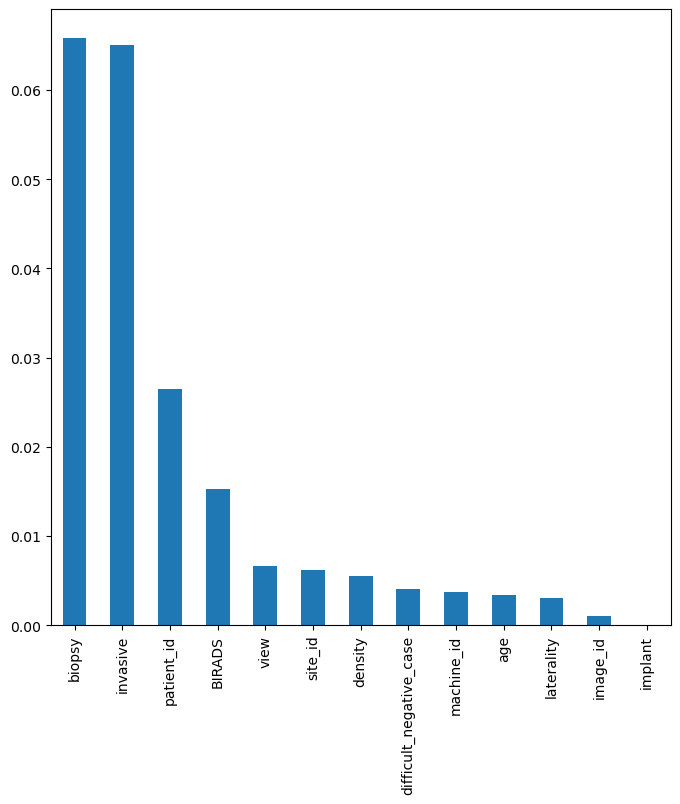

In [19]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(8,8))

<p id="part3-5"></p>

<p style="font-family: Times New Roman; font-size: 20px; font-style: bold; font-weight: bold; letter-spacing: 0px; color: #0000FF">3-5 Visualization</p>
<hr style="height: 1px; border: 1; background-color: #0000FF">

<Figure size 800x800 with 0 Axes>

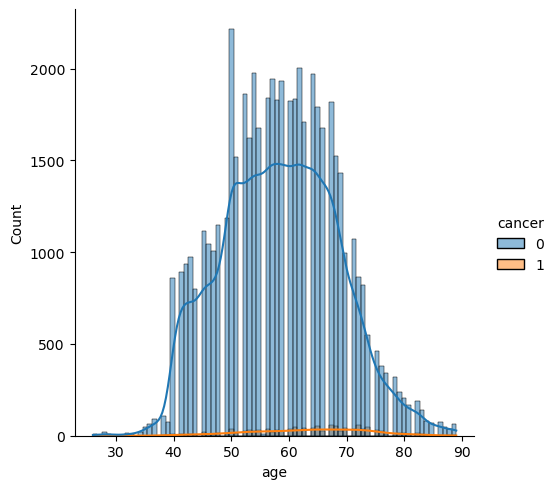

In [20]:
fig = plt.figure(figsize=(8,8))
sns.displot(data=train_df, x=train_df.age,kde=True,hue=train_df.cancer)

<AxesSubplot:title={'center':'Cancer detected'}, xlabel='age', ylabel='Count'>

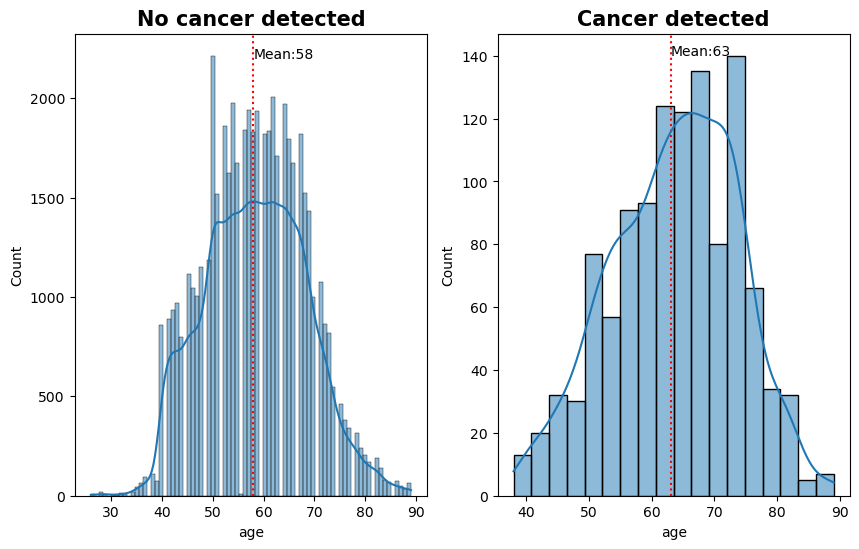

In [21]:
fig,(ax1,ax2)= plt.subplots(1,2,figsize=(10,6))
sns.histplot(data= train_df,x=train_df[train_df.cancer==0].age,kde=True,ax=ax1)
ax1.set_title('No cancer detected',weight='bold',size=15)
ax1.axvline(x=58,ls=':',color='red',)
ax1.text(x=58,y=2200,s=f'Mean:{int(train_df[train_df.cancer==0].age.mean())}')
ax2.set_title('Cancer detected',weight='bold',size=15)
ax2.axvline(x=63,ls=':',color='red',)
ax2.text(x=63,y=140,s=f'Mean:{int(train_df[train_df.cancer==1].age.mean())}')
sns.histplot(data= train_df,x=train_df[train_df.cancer==1].age,kde=True,ax=ax2)
